In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv("Churn_Modelling.csv")

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.drop(['RowNumber'], axis=1, inplace= True)

In [ ]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [ ]:
df= df.join(pd.get_dummies(df['Geography'], prefix= 'Geo').astype('int'))

In [ ]:
df.drop(['Geography'], axis=1, inplace= True)

In [ ]:
df.head()

,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
0,15634602,Hargrave,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,15647311,Hill,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,15619304,Onio,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,15701354,Boni,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,15737888,Mitchell,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [ ]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [ ]:
df['Gender']= df['Gender'].astype('str').apply(lambda x: 1 if x=='Female' else 0)

In [ ]:
df['Gender'].value_counts()

Gender
0    5457
1    4543
Name: count, dtype: int64

In [ ]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Geo_France', 'Geo_Germany', 'Geo_Spain'],
      dtype='object')

In [ ]:
df= df[['CustomerId', 'Surname', 'CreditScore', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Geo_France', 'Geo_Germany', 'Geo_Spain', 'Exited']]
df.head()

,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_France,Geo_Germany,Geo_Spain,Exited
0,15634602,Hargrave,619,1,42,2,0.00,1,1,1,101348.88,1,0,0,1
1,15647311,Hill,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,15619304,Onio,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0,1
3,15701354,Boni,699,1,39,1,0.00,2,0,0,93826.63,1,0,0,0
4,15737888,Mitchell,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Gender           10000 non-null  int64  
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Geo_France       10000 non-null  int64  
 12  Geo_Germany      10000 non-null  int64  
 13  Geo_Spain        10000 non-null  int64  
 14  Exited           10000 non-null  int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 1.1+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df[['CreditScore', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Geo_France', 'Geo_Germany', 'Geo_Spain', 'Exited']].corr().style.background_gradient(cmap='coolwarm')

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_France,Geo_Germany,Geo_Spain,Exited
CreditScore,1.000000,0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.008928,0.005538,0.004780,-0.027094
Gender,0.002857,1.000000,0.027544,-0.014733,-0.012087,0.021859,-0.005766,-0.022544,0.008112,-0.006772,0.024628,-0.016889,0.106512
Age,-0.003965,0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,-0.039208,0.046897,-0.001685,0.285323
Tenure,0.000842,-0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.002848,-0.000567,0.003868,-0.014001
Balance,0.006268,-0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,-0.231329,0.401110,-0.134892,0.118533
NumOfProducts,0.012238,0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,0.001230,-0.010419,0.009039,-0.047820
HasCrCard,-0.005458,-0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,0.002467,0.010577,-0.013480,-0.007138
IsActiveMember,0.025651,-0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,0.003317,-0.020486,0.016732,-0.156128
EstimatedSalary,-0.001384,0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,-0.003332,0.010297,-0.006482,0.012097
Geo_France,-0.008928,-0.006772,-0.039208,-0.002848,-0.231329,0.001230,0.002467,0.003317,-0.003332,1.000000,-0.580359,-0.575418,-0.104955


In [ ]:
X= df[['CreditScore', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Geo_France', 'Geo_Germany', 'Geo_Spain']]
y= df['Exited']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  train_test_split
sc= StandardScaler()
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)
X_train_scld= sc.fit_transform(X_train)
X_test_scld= sc.transform(X_test)

**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train_scld, y_train)
y_pred_lr= lr.predict(X_test_scld)
y_pred_lr

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
acc_lr= accuracy_score(y_test, y_pred_lr)
acc_lr

0.8095

ACCURACY= 80%

In [ ]:
from sklearn.metrics import confusion_matrix
cm= pd.DataFrame(confusion_matrix(y_test, y_pred_lr))
cm

,0,1
0,1535,48
1,333,84


**K NEAREST NERIGBORS CLASSIFIER**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
knn.fit(X_train_scld, y_train)
y_pred_knn= knn.predict(X_test_scld)
y_pred_knn

array([0, 0, 0, ..., 0, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score
acc_knn= accuracy_score(y_test, y_pred_knn)
acc_knn

0.826

ACCURACY= 83%

In [ ]:
from sklearn.metrics import confusion_matrix
cm_knn= confusion_matrix(y_test, y_pred_knn)
cm_knn= pd.DataFrame(cm_knn)
cm_knn

,0,1
0,1500,83
1,265,152


**SUPPORT VECTOR CLASSIFIER**

In [ ]:
from sklearn.svm import SVC
svc= SVC(kernel= 'rbf', probability=True)
svc.fit(X_train_scld, y_train)
y_pred_svc= svc.predict(X_test_scld)
y_pred_svc

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
acc_svc= accuracy_score(y_test, y_pred_svc)
acc_svc

0.851

ACCURACY: 85%

In [ ]:
from sklearn.metrics import confusion_matrix
cm_svc= confusion_matrix(y_test, y_pred_svc)
cm_svc= pd.DataFrame(cm_svc)
cm_svc

,0,1
0,1547,36
1,262,155


**DECISION TREE CLASSIFIER**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(criterion= 'gini')
dt.fit(X_train_scld, y_train)
y_pred_dt= dt.predict(X_test_scld)
y_pred_dt

array([1, 0, 1, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score
acc_dt= accuracy_score(y_test, y_pred_dt)
acc_dt

0.779

ACCURACY: 79%

In [ ]:
from sklearn.metrics import confusion_matrix
cm_dt= confusion_matrix(y_test, y_pred_dt)
cm_dt= pd.DataFrame(cm_dt)
cm_dt

,0,1
0,1345,238
1,204,213


**RANDOM FOREST CLASSIFIER**

In [ ]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=100, criterion='gini')
rfc.fit(X_train_scld, y_train)
y_pred_rfc= rfc.predict(X_test_scld)
y_pred_rfc

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score
acc_rfc= accuracy_score(y_test, y_pred_rfc)
acc_rfc

0.8595

ACCURACY: 86%

In [ ]:
from sklearn.metrics import confusion_matrix
cm_rfc= confusion_matrix(y_test, y_pred_rfc)
cm_rfc= pd.DataFrame(cm_rfc)
cm_rfc

,0,1
0,1530,53
1,228,189


**MODEL RANKING BASED ON ACCURACY SCORE**
1. Random Forest Classifier- 86%
2. Support Vector Classifier- 85%
3. K Nearest Neighbors Classifier- 83%
4. Logistic Regression- 80%
5. Decision Tree Classifier- 79%

**CUMULATIVE ACCURACY PROFILE ANALYSIS**


CAP Curve can be used to visualise the perfromance of models. It can also be used to compare the performance of different models and choose the best one.


The better your model, the closer its curve will be to the top left corner of the graph, indicating higher accuracy and efficiency in predicting positive cases.

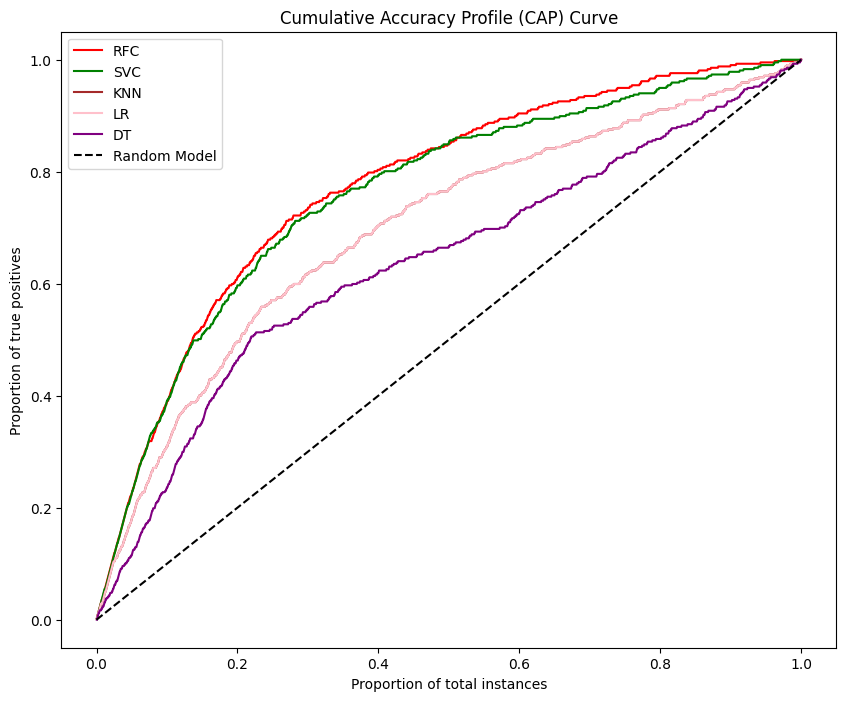

In [ ]:
import numpy as np
#RFC
y_probs_rfc = rfc.predict_proba(X_test_scld)[:, 1]
sorted_indices_rfc = np.argsort(y_probs_rfc)[::-1]
y_true_sorted_rfc = y_test.values[sorted_indices_rfc]
cumulative_true_positives_rfc = np.cumsum(y_true_sorted_rfc)
total_positives_rfc = np.sum(y_true_sorted_rfc)
x_rfc = np.arange(1, len(y_true_sorted_rfc) + 1) / len(y_true_sorted_rfc)
y_rfc = cumulative_true_positives_rfc / total_positives_rfc

#SVC
y_probs_svc = svc.predict_proba(X_test_scld)[:, 1]
sorted_indices_svc = np.argsort(y_probs_svc)[::-1]
y_true_sorted_svc = y_test.values[sorted_indices_svc]
cumulative_true_positives_svc = np.cumsum(y_true_sorted_svc)
total_positives_svc = np.sum(y_true_sorted_svc)
x_svc = np.arange(1, len(y_true_sorted_svc) + 1) / len(y_true_sorted_svc)
y_svc = cumulative_true_positives_svc / total_positives_svc

#KNN
y_probs_knn = knn.predict_proba(X_test_scld)[:, 1]
sorted_indices_knn = np.argsort(y_probs_knn)[::-1]
y_true_sorted_knn = y_test.values[sorted_indices_knn]
cumulative_true_positives_knn = np.cumsum(y_true_sorted_knn)
total_positives_knn = np.sum(y_true_sorted_knn)
x_knn = np.arange(1, len(y_true_sorted_knn) + 1) / len(y_true_sorted_knn)
y_knn = cumulative_true_positives_knn / total_positives_knn

#LOGISTIC REG
y_probs_lr = lr.predict_proba(X_test_scld)[:, 1]
sorted_indices_lr = np.argsort(y_probs_lr)[::-1]
y_true_sorted_lr = y_test.values[sorted_indices_lr]
cumulative_true_positives_lr = np.cumsum(y_true_sorted_lr)
total_positives_lr = np.sum(y_true_sorted_lr)
x_lr = np.arange(1, len(y_true_sorted_lr) + 1) / len(y_true_sorted_lr)
y_lr = cumulative_true_positives_lr / total_positives_lr

#DT
y_probs_dt = dt.predict_proba(X_test_scld)[:, 1]
sorted_indices_dt = np.argsort(y_probs_dt)[::-1]
y_true_sorted_dt = y_test.values[sorted_indices_dt]
cumulative_true_positives_dt = np.cumsum(y_true_sorted_dt)
total_positives_dt = np.sum(y_true_sorted_dt)
x_dt = np.arange(1, len(y_true_sorted_dt) + 1) / len(y_true_sorted_dt)
y_dt = cumulative_true_positives_dt / total_positives_dt

plt.figure(figsize=(10, 8))
plt.plot(x_rfc, y_rfc, label='RFC', color='red')
plt.plot(x_svc, y_svc, label='SVC', color='green')
plt.plot(x_knn, y_knn, label='KNN', color='brown')
plt.plot(x_lr, y_knn, label='LR', color='pink')
plt.plot(x_dt, y_dt, label='DT', color='purple')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Model', color='black')
plt.title('Cumulative Accuracy Profile (CAP) Curve')
plt.xlabel('Proportion of total instances')
plt.ylabel('Proportion of true positives')
plt.legend()
plt.show()